In [1]:
import pandas as pd

In [2]:
# Create a DataFrame
data = {
    'fete' : [1, 2, 9, 1],
    'baieti' : [0, 3, 4, 4] # same length
}
df.groupby('a')['b'].apply(list)

In [3]:
df = pd.DataFrame(data)

In [4]:
df2 = pd.DataFrame(data, index = ['a', 'b', 'c', 'd'])

In [5]:
df = pd.read_csv('train.csv', index_col = 'Id')

In [6]:
# Append the rows
temp_df = df.append(df)
print(temp_df.shape)

# Remove duplicates
temp_df2 = temp_df.drop_duplicates()
print(temp_df2.shape)

# Do it inplace
# keep = first => keep the first duplicate [DEFAULT]
# keep = last => keep the last duplicate
# keep = False => remove all duplicates
temp_df.drop_duplicates(inplace = True, keep = 'last')
print(temp_df.shape)

temp_df3 = df.append(df)
temp_df3.drop_duplicates(inplace = True, keep = False)
print(temp_df3.shape)

(2920, 80)
(1460, 80)
(1460, 80)
(0, 80)


In [7]:
# Columns
print(df.columns)

# Rename some of the columns via a dictionary
df.rename(columns = {
    'ExterCond': 'ExteriorCondition',
    'MoSold': 'MethSold'
}, inplace = True)

print(df.columns)

# We can also set the name of the columns by a list
df.columns = [col.lower() for col in df]

print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
""" Missing values """
df.isnull() # if NaN or None
df.isnull().sum() # sum of nulls in each col

# Drop rows with at least a null
df.dropna()

# Drop columns with at least a null
df.dropna(axis = 'columns')

for i, _ in df.iterrows():
    df.at[i, 'poolqc'] = int(i)
    if i > 150:
        break

df.fillna(6, inplace = True)

In [9]:
df.describe()
df['overallcond'].value_counts().head(10)

df.dtypes
dfi64 = df.select_dtypes(include = 'int64')

dfi64.corr()['saleprice']

mssubclass      -0.084284
lotarea          0.263843
overallqual      0.790982
overallcond     -0.077856
yearbuilt        0.522897
yearremodadd     0.507101
bsmtfinsf1       0.386420
bsmtfinsf2      -0.011378
bsmtunfsf        0.214479
totalbsmtsf      0.613581
1stflrsf         0.605852
2ndflrsf         0.319334
lowqualfinsf    -0.025606
grlivarea        0.708624
bsmtfullbath     0.227122
bsmthalfbath    -0.016844
fullbath         0.560664
halfbath         0.284108
bedroomabvgr     0.168213
kitchenabvgr    -0.135907
totrmsabvgrd     0.533723
fireplaces       0.466929
garagecars       0.640409
garagearea       0.623431
wooddecksf       0.324413
openporchsf      0.315856
enclosedporch   -0.128578
3ssnporch        0.044584
screenporch      0.111447
poolarea         0.092404
miscval         -0.021190
methsold         0.046432
yrsold          -0.028923
saleprice        1.000000
Name: saleprice, dtype: float64

In [11]:
""" Manipulation """

# Extract column as Series
df_sp_ser = df['saleprice']

# Extract column as DataFrame
df_sp_df = df[['saleprice']]

# Get row by name of index
df.loc[3] # In our case, the indices are ints and start with 1
df.iloc[2] # Same as above, since real index starts at 0

# Get slice
print(df.loc[1 : 3]) # Includes end
print(df.iloc[0 : 3]) # Does not include end

# Conditions
condition = (df['saleprice'] >= 500000) # It's just True or False in each cell
condition.head()

df[df['saleprice'] >= 500000]
df[(df['saleprice'] >= 500000) & (df['saleprice'] < 600000)]
df[df['lotconfig'] == 'Inside']
df[df['lotconfig'].isin(['Inside', 'IR1'])]

# Apply function
def is_expensive(price):
    if price >= 500000:
        return 'Expensive'
    
    return 'Cheap'

# Create a new column as the result of our function applied on another
df['priceexpensive'] = df['saleprice'].apply(is_expensive)

df.head(5)

    mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
Id                                                                    
1           60       RL         65.0     8450   Pave     6      Reg   
2           20       RL         80.0     9600   Pave     6      Reg   
3           60       RL         68.0    11250   Pave     6      IR1   

   landcontour utilities lotconfig  ... poolqc fence miscfeature miscval  \
Id                                  ...                                    
1          Lvl    AllPub    Inside  ...      1     6           6       0   
2          Lvl    AllPub       FR2  ...      2     6           6       0   
3          Lvl    AllPub    Inside  ...      3     6           6       0   

   methsold yrsold  saletype  salecondition  saleprice  priceexpensive  
Id                                                                      
1         2   2008        WD         Normal     208500           Cheap  
2         5   2007        WD         Normal 

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolqc,fence,miscfeature,miscval,methsold,yrsold,saletype,salecondition,saleprice,priceexpensive
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,6,Reg,Lvl,AllPub,Inside,...,1,6,6,0,2,2008,WD,Normal,208500,Cheap
2,20,RL,80.0,9600,Pave,6,Reg,Lvl,AllPub,FR2,...,2,6,6,0,5,2007,WD,Normal,181500,Cheap
3,60,RL,68.0,11250,Pave,6,IR1,Lvl,AllPub,Inside,...,3,6,6,0,9,2008,WD,Normal,223500,Cheap
4,70,RL,60.0,9550,Pave,6,IR1,Lvl,AllPub,Corner,...,4,6,6,0,2,2006,WD,Abnorml,140000,Cheap
5,60,RL,84.0,14260,Pave,6,IR1,Lvl,AllPub,FR2,...,5,6,6,0,12,2008,WD,Normal,250000,Cheap


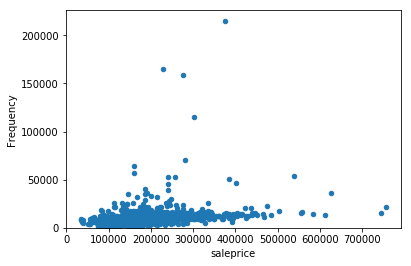

In [21]:
# Plotting
df.plot(kind = 'scatter', y = 'lotarea', x = 'saleprice');
df['saleprice'].plot(kind = 'hist', bins = 100);

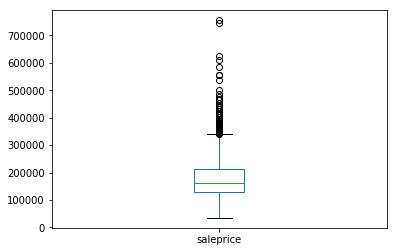

In [22]:
df['saleprice'].plot(kind = 'box')

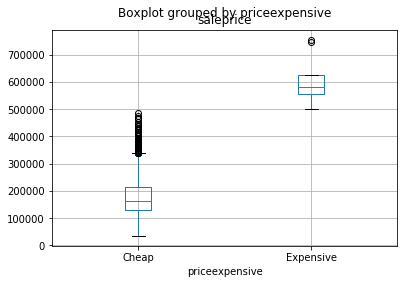

In [24]:
df.boxplot(column = 'saleprice', by = 'priceexpensive');